<a href="https://colab.research.google.com/github/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/blob/main/PREPROCESSING_ASPEK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm taudataNlpTm.py
!wget https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/taudataNlpTm.py
!rm taudata.py
!wget https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/taudata.py

!rm data/slangsoco.txt
!rm data/stopwords_en.txt
!rm data/stopwords_id.txt
!rm data/kata_dasar.txt
!rm data/corpus_sederhana.txt

!mkdir CSV
!wget -P CSV/ https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/CSV/AspekSentimenReview.csv

!mkdir data
!wget -P data/ https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/data/stopwords_id.txt
!wget -P data/ https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/data/stopwords_en.txt
!wget -P data/ https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/data/kata_dasar.txt
!wget -P data/ https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/data/wn-ind-def.tab
!wget -P data/ https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/data/wn-msa-all.tab
!wget -P data/ https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/data/all_indo_man_tag_corpus_model.crf.tagger
!wget -P data/ https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/data/slangsoco.txt

!pip install Sastrawi
!pip install unidecode
!pip install python-crfsuite
!pip install sklearn-pycrfsuite

rm: cannot remove 'taudataNlpTm.py': No such file or directory
--2021-08-13 18:15:15--  https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/taudataNlpTm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16713 (16K) [text/plain]
Saving to: ‘taudataNlpTm.py’

taudataNlpTm.py     100%[===================>]  16.32K  --.-KB/s    in 0s      

2021-08-13 18:15:15 (94.3 MB/s) - ‘taudataNlpTm.py’ saved [16713/16713]

rm: cannot remove 'taudata.py': No such file or directory
--2021-08-13 18:15:15--  https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/taudata.py
Resolving raw

In [2]:
import taudata as tau
import pandas as pd
import seaborn as sns
from textblob import TextBlob
import nltk
from tqdm import tqdm_notebook as tqdm
from collections import Counter
from google.colab import files
from IPython import display
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [3]:
df = pd.read_csv('CSV/AspekSentimenReview.csv')
df.head()

,At,Sentimen,Review,Bintang,Aspek
0,2020-10-18 19:32:19,1,gud,5,Lainnya
1,2020-10-17 20:18:47,1,"Seneng belanja disini karna dah pastinya ori, ...",5,Layanan
2,2020-10-17 07:44:22,-1,"Pertamakali order langsung kecewa, di cancel k...",1,Layanan
3,2020-10-17 05:29:05,-1,Sociolla parah. Proses refund gak tau harus nu...,1,Layanan
4,2020-10-17 00:12:18,-1,Sy order 4 product di tanggal 11 september dan...,1,Layanan


In [4]:
sw=open('data/slangsoco.txt',"r",encoding="utf-8", errors='replace')
slangS = sw.readlines(); sw.close()

slangS = [df.strip('\n').strip() for df in slangS]
slangS = [s_.split(' : ') for s_ in slangS]
slang_ = {}
for s_ in slangS:
    try:
        slang_[s_[0].strip()] = s_[1].strip()
    except:
        print(s_)
slangS = slang_.copy()

['udah sudah']


In [5]:
b = []
for h in df['Review']:
    T = TextBlob(h.lower()).words
    for i,t in enumerate(T):
        if str(t) in slangS.keys():
            T[i] = slangS[str(t)]
    b.append(' '.join(T))

b[:5]

['good',
 'senang belanja disini karena deh pastinya original pengiriman langsung jalan satu hari setelah bayar banyak diskon admin responsif juga metode pembayaran juga banyak dan reachable suka sekali tetapi terkadang ada suka error tidak jelas begitu selain itu sudah bagus sekali sih menurut saya recommended',
 'pertama kali order langsung kecewa di cancel karena barang nya ada satu yang kosong proses pengembalian uang sulit check out tanggal 13 oktober konfirmasi tanggal 15 uang akan di kembalikan dalam 7-10 hari kerja maks tanggal 2 november kelamaan woi karena banyak antrian refund katanya tidak ingin sedang order lewat sini',
 'sociola parah proses refund tidak tahu harus menunggu berapa lama padahal ini sudah masuk 3 hari kerja uang saya 775.439 belum dikembalikan padahal sociola sendiri yang cancel order saya karena ada stock barang yang kosong email juga udah 2 hari tidak direspon',
 'saya order 4 product di tanggal 11 september dan yang datang hanya 2 ini udah 16 oktober art

In [6]:
stopId, lemmaId = tau.LoadStopWords(lang='id')

In [7]:
data = []
for i, d in tqdm(enumerate(b)):
    doc = tau.cleanText(d, lemma=lemmaId, stops = stopId, symbols_remove = True, min_charLen = 2, fixTag= True, fixMix=True)
    data.append(doc)

print(data[:3])

0it [00:00, ?it/s]

['good', 'senang belanja deh original kirim langsung jalan bayar diskon admin responsif metode bayar reachable suka terkadang suka error tidak bagus sih recommended', 'kali order langsung kecewa cancel barang nya kosong proses uang sulit check out tanggal  13  oktober konfirmasi tanggal  15  uang  7 - 10  kerja maks tanggal november woi antri refund tidak order']


In [8]:
df['data_cleaned_aspek'] = data
df.to_csv('PREPROSS.csv')
df.head()

,At,Sentimen,Review,Bintang,Aspek,data_cleaned_aspek
0,2020-10-18 19:32:19,1,gud,5,Lainnya,good
1,2020-10-17 20:18:47,1,"Seneng belanja disini karna dah pastinya ori, ...",5,Layanan,senang belanja deh original kirim langsung jal...
2,2020-10-17 07:44:22,-1,"Pertamakali order langsung kecewa, di cancel k...",1,Layanan,kali order langsung kecewa cancel barang nya k...
3,2020-10-17 05:29:05,-1,Sociolla parah. Proses refund gak tau harus nu...,1,Layanan,sociola parah proses refund tidak tunggu masuk...
4,2020-10-17 00:12:18,-1,Sy order 4 product di tanggal 11 september dan...,1,Layanan,order product tanggal 11 september udah 16 ...


In [9]:
df.dtypes

At                    object
Sentimen               int64
Review                object
Bintang                int64
Aspek                 object
data_cleaned_aspek    object
dtype: object

In [10]:
df_lay = df[df['Aspek']=="Layanan"]['data_cleaned_aspek']
df_lay.to_csv('aspek_layanan.csv', encoding='utf8', index = False)
df_tam = df[df['Aspek']=="Tampilan"]['data_cleaned_aspek']
df_tam.to_csv('aspek_tampilan.csv', encoding='utf8', index = False)
df_pro = df[df['Aspek']=="Produk"]['data_cleaned_aspek']
df_pro.to_csv('aspek_produk.csv', encoding='utf8', index = False)
df_la = df[df['Aspek']=="Lainnya"]['data_cleaned_aspek']
df_la.to_csv('aspek_lainnya.csv', encoding='utf8', index = False)

## **PROPORSI TEXT ANALITICS DATA ASPEK**

In [11]:
df['At'] = pd.to_datetime(df['At'])
 
date_counts = (df.groupby(df['At'].dt.year)['Aspek']
                .value_counts()
                .rename('Data')
                .reset_index()
                .sort_values('At'))
print(date_counts)

     At     Aspek  Data
0  2019  Tampilan   665
1  2019   Lainnya   541
2  2019   Layanan   157
3  2019    Produk    85
4  2020  Tampilan   247
5  2020   Lainnya   174
6  2020   Layanan   155
7  2020    Produk    49


Proporsi Aspek Tahun


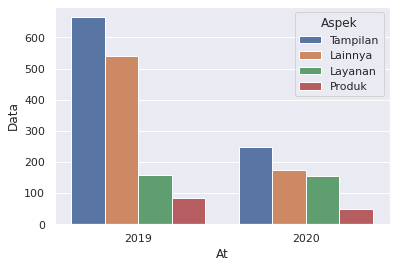

In [12]:
print("Proporsi Aspek Tahun")
p = sns.barplot(x="At", y="Data", hue="Aspek", data=date_counts)